# Blood Pressure Data Visualisation


In [1]:
## Importing important libraries

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rc('xtick', labelsize=12) 
matplotlib.rc('ytick', labelsize=30)
matplotlib.rcParams.update({'font.size': 28})
import math
import datetime as dt
import os
import sys

## Utility Functions

In [2]:

## Visulalization function 
def Visualize(dataset,List_of_count_to_print,title1,ylab,vx=50,vy=30,w=.80):
    df = dataset
    n = 0
    for i in List_of_count_to_print:
        filter1 = df['Country'] == i
        df = df[filter1]
        labels = df['Date']
        conf = df['Confirmed']
        Recov = df['Recovered']
        Death = df['Deaths']
        
        #high = max(conf)
        #low = min(conf)
        
        x = np.arange(len(labels))  # the x label locations 
        width = w  # the width of the bars
        fig, ax = plt.subplots(figsize=(vx,vy))
        rects1 = ax.bar(x - width, conf, width, label='confirmed')
        rects2 = ax.bar(x , Recov, width, label='Recovered')
        rects3 = ax.bar(x + width , Death, width, label='Death')

        # Add some text for labels, title and custom x-axis tick labels, etc.
        ax.set_ylabel(ylab)
        ax.set_title(title1)
        ax.set_xticks(x)
        plt.xticks(rotation=90) 
        #plt.ylim([math.ceil(low-0.5*(high-low)), math.ceil(high+0.5*(high-low))])
        ax.set_xticklabels(labels)
        ax.legend()
        n  = n + 1
    
    
    plt.show()
    
## function to Check the List of Countries avaialable
def count_avalaible(dataframe,country_coul_rep = 'Country'):
    x = 0
    for i in set(dataframe.loc[:,country_coul_rep]):
        print(i,end=' | ')
        x = x + 1
        if(x > 6):
            x = 0
            print()
    print("\n\n##Total No of Countries = " + str(len(set(dataframe.loc[:,country_coul_rep]))))
    
    

## Loading Blood Pressure Data

In [3]:
Blood_Pressure_Countires_Wise = pd.read_csv('../../Blood Pressure/NCD_RisC_Lancet_2016_BP_age_standardised_countries.csv')
Blood_Pressure_Countires_Wise

,Country/Region/World,ISO,Sex,Year,Mean systolic blood pressure (mmHg),Mean systolic blood pressure lower 95% uncertainty interval (mmHg),Mean systolic blood pressure upper 95% uncertainty interval (mmHg),Mean diastolic blood pressure (mmHg),Mean diastolic blood pressure lower 95% uncertainty interval (mmHg),Mean diastolic blood pressure upper 95% uncertainty interval (mmHg),Prevalence of raised blood pressure,Prevalence of raised blood pressure lower 95% uncertainty interval,Prevalence of raised blood pressure upper 95% uncertainty interval
0,Afghanistan,AFG,Men,1975,121.078635,110.560019,131.280612,76.217903,69.432058,82.910254,0.251041,0.139465,0.389490
1,Afghanistan,AFG,Men,1976,121.213135,111.237480,130.972393,76.302382,69.841522,82.712827,0.252482,0.145232,0.385497
2,Afghanistan,AFG,Men,1977,121.352221,111.913929,130.796611,76.389730,70.243390,82.518096,0.254044,0.150297,0.380740
3,Afghanistan,AFG,Men,1978,121.493430,112.391051,130.595529,76.479429,70.680791,82.339212,0.255709,0.155271,0.376442
4,Afghanistan,AFG,Men,1979,121.636602,112.922056,130.367636,76.570570,70.991105,82.190582,0.257459,0.160139,0.372394
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16395,Zimbabwe,ZWE,Women,2011,128.940075,123.068150,134.650050,81.826424,78.142254,85.433267,0.292645,0.220405,0.373089
16396,Zimbabwe,ZWE,Women,2012,128.888469,122.551047,135.017940,81.915237,77.954709,85.844238,0.292299,0.215945,0.376634
16397,Zimbabwe,ZWE,Women,2013,128.838725,122.010757,135.492069,82.002664,77.677150,86.205531,0.292014,0.211607,0.380645
16398,Zimbabwe,ZWE,Women,2014,128.790787,121.435755,136.045081,82.091112,77.443888,86.608317,0.291787,0.205964,0.385429


In [4]:
## Check the List of Countries avaialable

#Blood_Pressure_Countires_Wise

## Columns renaming for Uniformity

Blood_Pressure_Countires_Wise = Blood_Pressure_Countires_Wise.rename(columns={'Country/Region/World': 'Country'})
count_avalaible(Blood_Pressure_Countires_Wise,'Country')


Cameroon | Uganda | Sierra Leone | Malta | Cyprus | Finland | Romania | 
Namibia | Albania | Mauritius | Niue | Equatorial Guinea | Canada | India | 
Paraguay | Czech Republic | Tajikistan | Hungary | Afghanistan | Egypt | Oman | 
Viet Nam | Chad | Argentina | Rwanda | Burundi | Kuwait | Norway | 
Georgia | Honduras | Singapore | Japan | Bosnia and Herzegovina | Nepal | Jamaica | 
Lesotho | Bahamas | French Polynesia | United States of America | Thailand | Dominica | Denmark | 
Greece | Moldova | Sweden | Bermuda | Panama | Greenland | Gabon | 
Austria | Tanzania | Benin | Colombia | Ethiopia | Tonga | DR Congo | 
Zimbabwe | Saint Vincent and the Grenadines | Luxembourg | Ireland | Somalia | New Zealand | Malaysia | 
Nicaragua | Palau | Qatar | Syrian Arab Republic | Kyrgyzstan | Sudan | Andorra | 
Ghana | Grenada | Lao PDR | Malawi | Israel | Indonesia | Saudi Arabia | 
Latvia | Mexico | Ukraine | Belize | Liberia | Uzbekistan | Cook Islands | 
Slovakia | Niger | Congo | France | Seyc

In [5]:
#print(set(Blood_Pressure_Countires_Wise['Country/Region/World']))

Country_to_look_for = 'India'
ylab = "ratio"
xlab = "Year"
filter1 = Blood_Pressure_Countires_Wise['Country'] == Country_to_look_for
Blood_Pressure_Countires_Wise_country_specific = Blood_Pressure_Countires_Wise[filter1]
Blood_Pressure_Countires_Wise_country_specific                 
#Blood_Pressure_Countires_Wise  ## Uncomment this to view for all countires at once

,Country,ISO,Sex,Year,Mean systolic blood pressure (mmHg),Mean systolic blood pressure lower 95% uncertainty interval (mmHg),Mean systolic blood pressure upper 95% uncertainty interval (mmHg),Mean diastolic blood pressure (mmHg),Mean diastolic blood pressure lower 95% uncertainty interval (mmHg),Mean diastolic blood pressure upper 95% uncertainty interval (mmHg),Prevalence of raised blood pressure,Prevalence of raised blood pressure lower 95% uncertainty interval,Prevalence of raised blood pressure upper 95% uncertainty interval
3321,India,IND,Men,1975,122.350379,114.041114,130.406286,78.007941,72.435968,83.795106,0.242063,0.140102,0.361623
3322,India,IND,Men,1976,122.455017,114.618921,129.962311,78.057072,72.873279,83.382430,0.242517,0.145429,0.355080
3323,India,IND,Men,1977,122.557283,115.219463,129.524269,78.103911,73.299619,83.091873,0.242985,0.151062,0.348327
3324,India,IND,Men,1978,122.655957,115.878855,129.206492,78.148476,73.666794,82.785494,0.243477,0.156043,0.342532
3325,India,IND,Men,1979,122.756322,116.518464,128.682056,78.193339,73.970279,82.465459,0.244013,0.160331,0.337049
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11557,India,IND,Women,2011,124.516704,122.541863,126.440123,78.669085,77.395098,79.971426,0.246648,0.205277,0.289974
11558,India,IND,Women,2012,124.482273,122.207197,126.696852,78.777913,77.321456,80.237050,0.246918,0.202225,0.294040
11559,India,IND,Women,2013,124.437534,121.811331,127.014735,78.885454,77.226168,80.553494,0.247142,0.198809,0.298864
11560,India,IND,Women,2014,124.386239,121.351055,127.362613,78.989876,77.073845,80.946841,0.247312,0.194690,0.305265


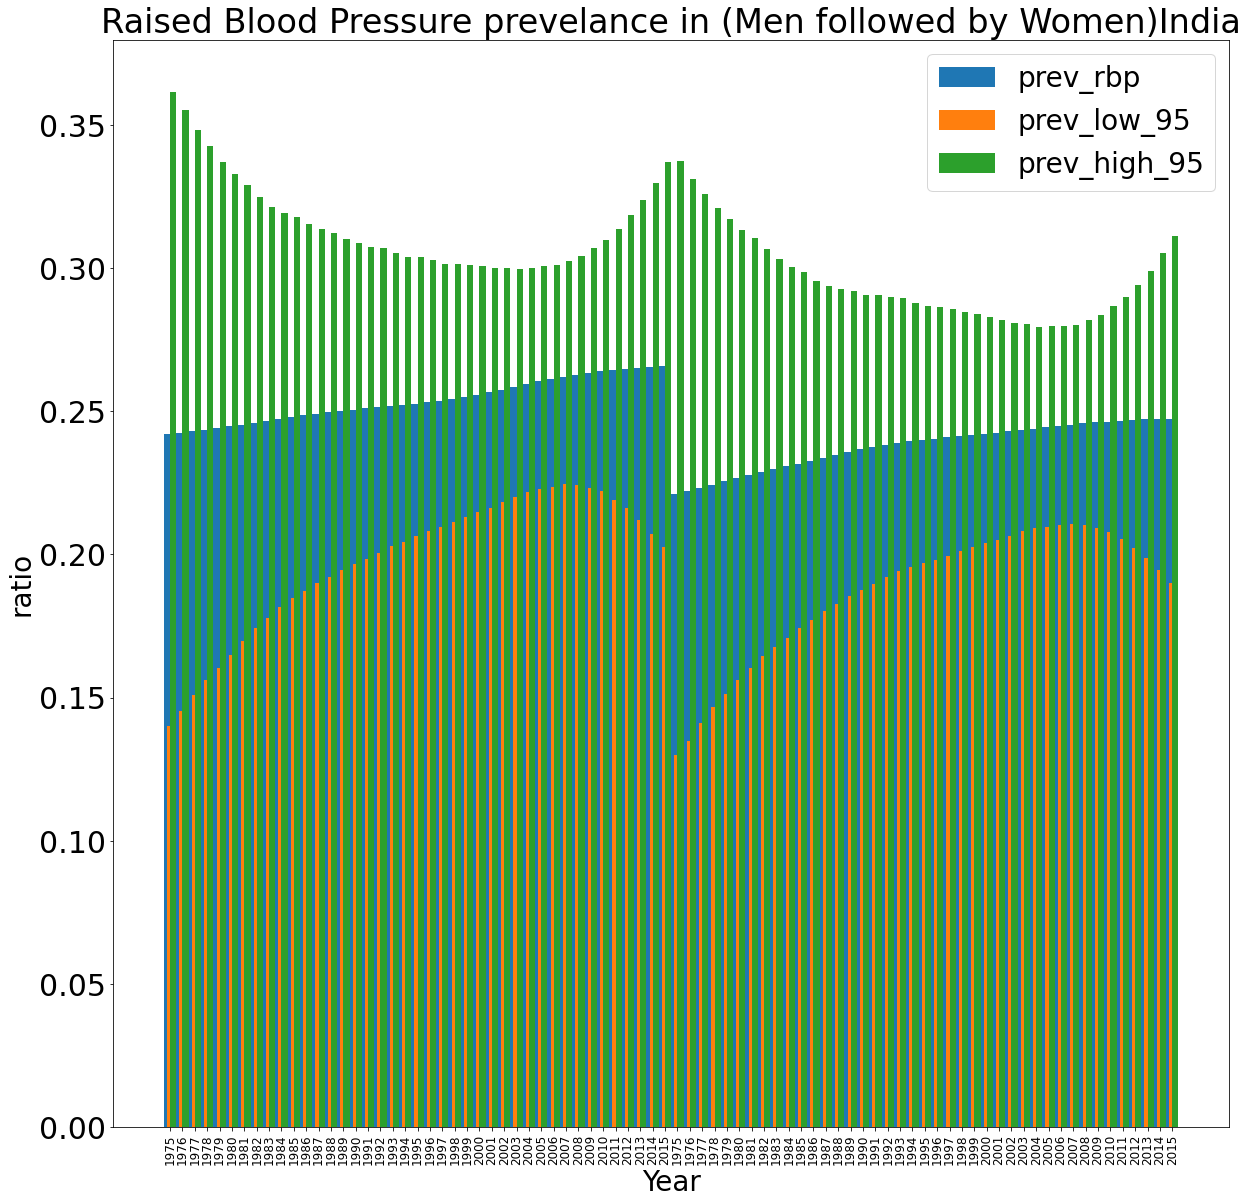

In [8]:
## Visualisation
df = Blood_Pressure_Countires_Wise_country_specific
        
    

labels = df['Year']
prev_rbp = df['Prevalence of raised blood pressure']
prev_low_95 = df['Prevalence of raised blood pressure lower 95% uncertainty interval']
prev_high_95 = df['Prevalence of raised blood pressure upper 95% uncertainty interval']
        
title1 = 'Raised Blood Pressure prevelance in (Men followed by Women)' + str(Country_to_look_for)
         
        #high = max(conf)
        #low = min(conf)
        
x = np.arange(len(labels))  # the x label locations 
width = .50  # the width of the bars
fig, ax = plt.subplots(figsize=(20,20))
rects1 = ax.bar(x-width/2, prev_rbp, width, label='prev_rbp')
rects2 = ax.bar(x, prev_low_95, width, label='prev_low_95')
rects3 = ax.bar(x+width/2, prev_high_95, width, label='prev_high_95')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel(ylab)
ax.set_xlabel(xlab)
ax.set_title(title1)
ax.set_xticks(x)
plt.xticks(rotation=90) 
#plt.ylim([math.ceil(low-0.5*(high-low)), math.ceil(high+0.5*(high-low))])
ax.set_xticklabels(labels)
ax.legend()

    
    
plt.show()

## Cleaning Blood_Pressure DATA(Preprocessing)

In [11]:
Blood_Pressure_Countires_Wise = Blood_Pressure_Countires_Wise.drop(['Mean systolic blood pressure (mmHg)', 
                                                                    'Mean systolic blood pressure upper 95% uncertainty interval (mmHg)',
                                                                   'Mean systolic blood pressure lower 95% uncertainty interval (mmHg)',
                                                                   'Mean diastolic blood pressure (mmHg)',
                                                                   'Mean diastolic blood pressure lower 95% uncertainty interval (mmHg)',
                                                                   'Mean diastolic blood pressure upper 95% uncertainty interval (mmHg)'], axis=1)

In [12]:
Blood_Pressure_Countires_Wise

,Country,ISO,Sex,Year,Prevalence of raised blood pressure,Prevalence of raised blood pressure lower 95% uncertainty interval,Prevalence of raised blood pressure upper 95% uncertainty interval
0,Afghanistan,AFG,Men,1975,0.251041,0.139465,0.389490
1,Afghanistan,AFG,Men,1976,0.252482,0.145232,0.385497
2,Afghanistan,AFG,Men,1977,0.254044,0.150297,0.380740
3,Afghanistan,AFG,Men,1978,0.255709,0.155271,0.376442
4,Afghanistan,AFG,Men,1979,0.257459,0.160139,0.372394
...,...,...,...,...,...,...,...
16395,Zimbabwe,ZWE,Women,2011,0.292645,0.220405,0.373089
16396,Zimbabwe,ZWE,Women,2012,0.292299,0.215945,0.376634
16397,Zimbabwe,ZWE,Women,2013,0.292014,0.211607,0.380645
16398,Zimbabwe,ZWE,Women,2014,0.291787,0.205964,0.385429


##  Writing the cleaned data in Cleaned Folder

In [15]:
Blood_Pressure_Countires_Wise.to_csv('../Pre_Processed_Data/Blood_Pressure_Countires_Wise_Processed.csv')

## Visualisation After Cleaning 

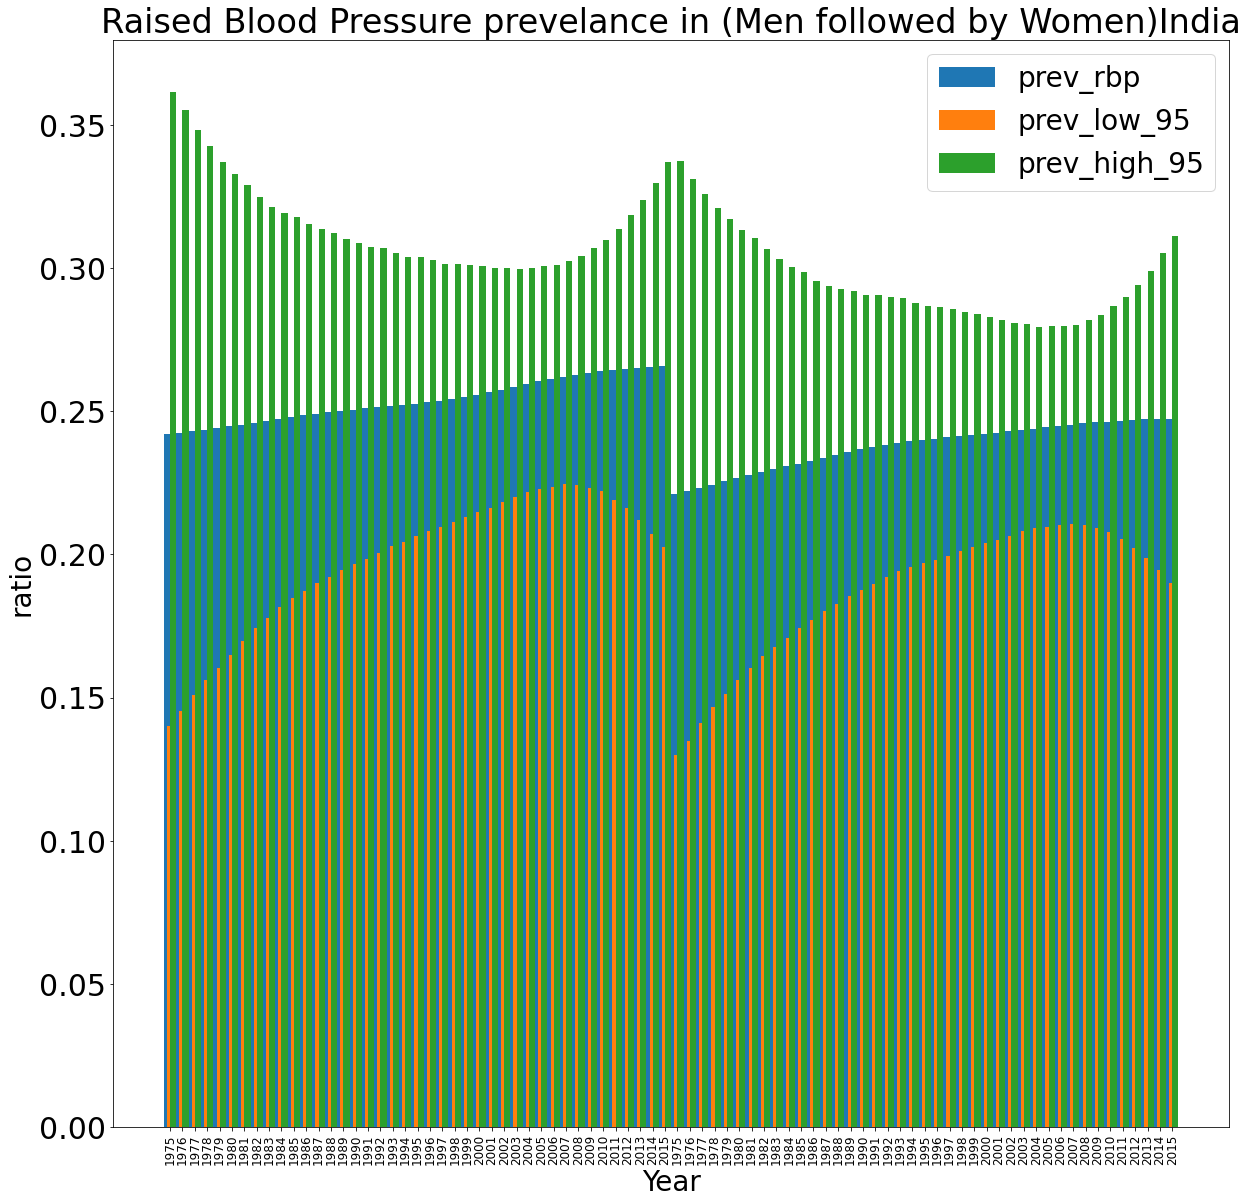

In [14]:
## Visualisation
df = Blood_Pressure_Countires_Wise_country_specific
        
    

labels = df['Year']
prev_rbp = df['Prevalence of raised blood pressure']
prev_low_95 = df['Prevalence of raised blood pressure lower 95% uncertainty interval']
prev_high_95 = df['Prevalence of raised blood pressure upper 95% uncertainty interval']
        
title1 = 'Raised Blood Pressure prevelance in (Men followed by Women)' + str(Country_to_look_for)
         
        #high = max(conf)
        #low = min(conf)
        
x = np.arange(len(labels))  # the x label locations 
width = .50  # the width of the bars
fig, ax = plt.subplots(figsize=(20,20))
rects1 = ax.bar(x-width/2, prev_rbp, width, label='prev_rbp')
rects2 = ax.bar(x, prev_low_95, width, label='prev_low_95')
rects3 = ax.bar(x+width/2, prev_high_95, width, label='prev_high_95')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel(ylab)
ax.set_xlabel(xlab)
ax.set_title(title1)
ax.set_xticks(x)
plt.xticks(rotation=90) 
#plt.ylim([math.ceil(low-0.5*(high-low)), math.ceil(high+0.5*(high-low))])
ax.set_xticklabels(labels)
ax.legend()

    
    
plt.show()